In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
DATA_DIRECTORY = "../data"
DATA_FILE = "histogram_cuda.csv"

In [3]:
df = pd.read_csv(DATA_DIRECTORY + '/' + DATA_FILE, sep=',').drop(columns=['nb_bins', 'nb_repeat', 'rep', 'check_status']);df

,kernel,threads/bloc,array_len,timing
0,histogram,none,8192,0.021118
1,histogram,none,8192,0.020890
2,histogram,none,8192,0.021118
3,histogram,none,8192,0.021021
4,histogram,none,8192,0.021014
...,...,...,...,...
315,histogram_cuda,1024,1048576,0.000991
316,histogram_cuda,1024,1048576,0.000999
317,histogram_cuda,1024,1048576,0.000992
318,histogram_cuda,1024,1048576,0.000996


In [4]:
df_ref = df[df['kernel'] == 'histogram'].drop(columns=['threads/bloc']);df_ref
df_ref = df_ref.groupby(['kernel','array_len'])['timing'].median().reset_index();df_ref

,kernel,array_len,timing
0,histogram,8192,0.021058
1,histogram,16384,0.042160
2,histogram,32768,0.084336
3,histogram,65536,0.168753
4,histogram,131072,0.337097
5,histogram,262144,0.670193
6,histogram,524288,1.340699
7,histogram,1048576,2.696731


In [5]:
df_test = df[df['kernel'] != 'histogram'];df_test
df_test = df_test.groupby(['kernel', 'threads/bloc', 'array_len'])['timing'].median().reset_index();df_test

,kernel,threads/bloc,array_len,timing
0,histogram_cuda,1024,8192,0.000135
1,histogram_cuda,1024,16384,0.000147
2,histogram_cuda,1024,32768,0.000215
3,histogram_cuda,1024,65536,0.000294
4,histogram_cuda,1024,131072,0.000361
5,histogram_cuda,1024,262144,0.000451
6,histogram_cuda,1024,524288,0.000685
7,histogram_cuda,1024,1048576,0.000992
8,histogram_cuda,256,8192,0.000140
9,histogram_cuda,256,16384,0.000244


In [6]:
df_merged = pd.merge(df_test, df_ref[['array_len', 'timing']], on='array_len', how='left', suffixes=('', '_ref'));df_merged

,kernel,threads/bloc,array_len,timing,timing_ref
0,histogram_cuda,1024,8192,0.000135,0.021058
1,histogram_cuda,1024,16384,0.000147,0.042160
2,histogram_cuda,1024,32768,0.000215,0.084336
3,histogram_cuda,1024,65536,0.000294,0.168753
4,histogram_cuda,1024,131072,0.000361,0.337097
5,histogram_cuda,1024,262144,0.000451,0.670193
6,histogram_cuda,1024,524288,0.000685,1.340699
7,histogram_cuda,1024,1048576,0.000992,2.696731
8,histogram_cuda,256,8192,0.000140,0.021058
9,histogram_cuda,256,16384,0.000244,0.042160


In [7]:
df_merged['speedup'] = df_merged['timing_ref'] / df_merged['timing'];df_merged

,kernel,threads/bloc,array_len,timing,timing_ref,speedup
0,histogram_cuda,1024,8192,0.000135,0.021058,156.338286
1,histogram_cuda,1024,16384,0.000147,0.042160,285.929209
2,histogram_cuda,1024,32768,0.000215,0.084336,391.856747
3,histogram_cuda,1024,65536,0.000294,0.168753,574.514353
4,histogram_cuda,1024,131072,0.000361,0.337097,933.491870
5,histogram_cuda,1024,262144,0.000451,0.670193,1485.334226
6,histogram_cuda,1024,524288,0.000685,1.340699,1957.913660
7,histogram_cuda,1024,1048576,0.000992,2.696731,2719.430083
8,histogram_cuda,256,8192,0.000140,0.021058,150.807958
9,histogram_cuda,256,16384,0.000244,0.042160,172.908210


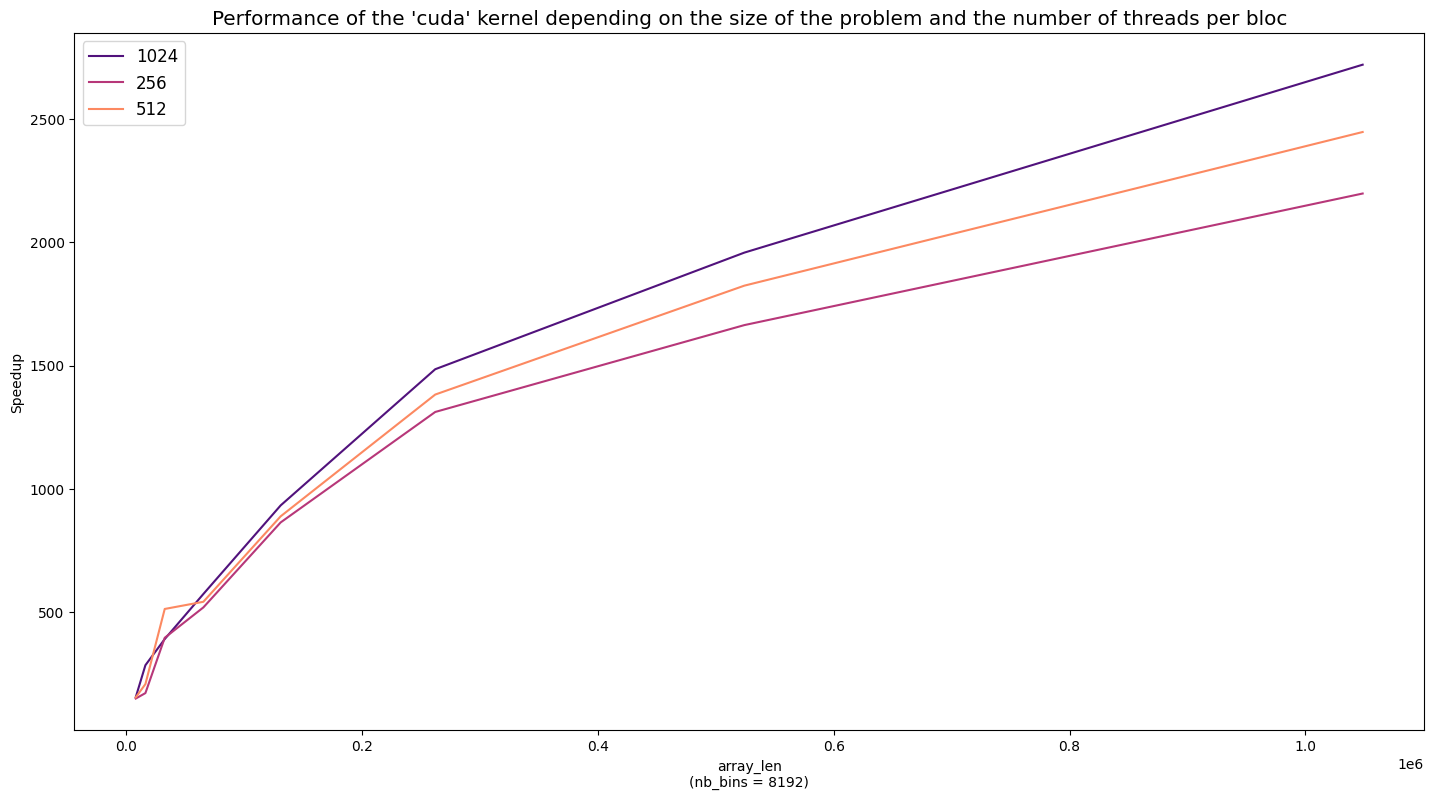

In [8]:
fig, ax = plt.subplots(figsize=(14.5,8))
plt.rcParams.update({'font.size': 12})
sns.lineplot(data=df_merged, x="array_len", y="speedup", hue="threads/bloc", markers='o', err_style='bars', palette="magma")
plt.legend(loc='upper left')
plt.title("Performance of the 'cuda' kernel depending on the size of the problem and the number of threads per bloc")
plt.tight_layout()
plt.xlabel('array_len\n(nb_bins = 8192)')
plt.ylabel('Speedup')
plt.savefig("../plots/histogram_cuda/histogram_cuda.png", format='png')
plt.show()